In [1]:
import math
import numpy as np
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import random
import graphviz
from graphviz import Digraph
import sympy
from collections import defaultdict
import heapq
from os import walk
from datetime import datetime
import seaborn as sns

In [2]:
devices = pd.read_csv("devices.csv")

In [3]:
devices

Device_id                     name  \
0       10998                 AK05'Uld   
1       11003           AK05'Vent'SV14   
2       11005     AK05'Vent'SV14'FanEx   
3       11007    AK05'Vent'SV14'FanEx1   
4       11011    AK05'Vent'SV14'PreHcl   
5       11029        AK05'VorAn'VorAn1   
6       11030        AK05'VorAn'VorAn2   
7       13318            AK41'PaPaneel   
8     3471239   AK01'Mbus'Elarv'Mtr100   
9     3471241   AK01'Mbus'Elarv'Mtr101   
10    3471242   AK01'Mbus'Elarv'Mtr102   
11    3471243   AK01'Mbus'Elarv'Mtr103   
12    3471244   AK01'Mbus'Elarv'Mtr104   
13    3471245   AK01'Mbus'Elarv'Mtr105   
14    3471246   AK01'Mbus'Elarv'Mtr106   
15    3471247   AK01'Mbus'Elarv'Mtr107   
16    3471248   AK01'Mbus'Elarv'Mtr108   
17    3471249   AK01'Mbus'Elarv'Mtr109   
18    3471250   AK01'Mbus'Elarv'Mtr110   
19    3471251   AK01'Mbus'Elarv'Mtr111   
20    3471252   AK01'Mbus'Elarv'Mtr112   
21    3471253   AK01'Mbus'Elarv'Mtr113   
22    3471254   AK01'Mbus'Elarv'Mtr114   
23    3471255   AK01'Mbus'Elarv'Mtr115   
24    3471257   AK01'Mbus'Elarv'Mtr116   
25    3471283   AK01'Mbus'Elarv'Mtr117   
26    3471286   AK01'Mbus'Elarv'Mtr118   
27    3471287   AK01'Mbus'Elarv'Mtr119   
28    3471288   AK01'Mbus'Elarv'Mtr120   
29    3471259  AK01'Mbus'Sooarv'Mtr200   
30    3471260  AK01'Mbus'Sooarv'Mtr201   
31    3471261  AK01'Mbus'Sooarv'Mtr202   
32    3471262  AK01'Mbus'Sooarv'Mtr203   
33    3471282  AK01'Mbus'Sooarv'Mtr204   
34    3471264  AK01'Mbus'Veearv'Mtr001   
35    3471265  AK01'Mbus'Veearv'Mtr002   
36    3471266  AK01'Mbus'Veearv'Mtr003   
37    3471267  AK01'Mbus'Veearv'Mtr004   
38    3471268  AK01'Mbus'Veearv'Mtr005   
39    3471269  AK01'Mbus'Veearv'Mtr006   
40    3471279  AK01'Mbus'Veearv'Mtr007   

                                       description  
0                                           Üldine  
1                                   Pumba treening  
2                                   Soojustagastus  
3                                   Soojustagastus  
4                                Väljatõmbe filter  
5                Võrguanalüsaator PJK 1. sektsioon  
6                Võrguanalüsaator PJK 2. sektsioon  
7                       Päikesepaneelide Dataloger  
8                                PJK - GTJK (S1.1)  
9                                 PJK - PVJK1 (S3)  
10                             PJK - JK3.4 (S1.10)  
11                            PJK - VJK0.1 (S1.12)  
12                            PJK - VJK0.3 (S1.13)  
13                            PJK - VJK4.1 (S1.14)  
14                            PJK - VJK4.2 (S1.15)  
15                          PJK - JSSJK0.1 (S1.16)  
16                               PJK - GTJK (S2.1)  
17                                PJK - PVJK2 (S4)  
18                              PJK - JK1.4 (S2.7)  
19                              PJK - JK2.5 (S2.9)  
20                            PJK - VJK0.2 (S2.14)  
21                            PJK - VJK0.5 (S2.15)  
22                            PJK - VJK4.3 (S2.16)  
23                           PJK - VVJK0.1 (S2.17)  
24                            PJK - VJK0.4 (S2.18)  
25                             PJK - LR0.2 (S1.22)  
26                                 JK-Side - Elisa  
27                                 JK-Side - Telia  
28                                 JK-Side - Tele2  
29                  Sooja vee tootmine (Ruum 0013)  
30                      Radiaatoriküte (Ruum 0013)  
31                          Vent. küte (Ruum 0013)  
32                         Põrandaküte (Ruum 0013)  
33                                  Jahutusarvesti  
34                         Külm vesi (Ruum 1031-A)  
35                          Soe vesi (Ruum 1031-A)  
36         Külm vesi - Hoone tarbevesi (Ruum 0013)  
37        Külm vesi - TTV mahuti täide (Ruum 0013)  
38  Külm vesi - Avariijahutuse süsteem (Ruum 0013)  
39      Soe vesi - Küttesüsteemi täide (Ruum 0013)  
40                    Soojavee tsirk (Ruum 1031-A)

In [4]:
times = pd.read_csv("../DeltaDataAlgo/DeviceTimeseries.csv")
pd.set_option('display.max_rows', None)
times

Device_id             device_label   measurement  \
0        10998                 AK05'Uld           Lux   
1        10998                 AK05'Uld          TE00   
2        11003           AK05'Vent'SV14  RuumTESP1.X1   
3        11003           AK05'Vent'SV14  RuumTESP1.X2   
4        11003           AK05'Vent'SV14  RuumTESP1.X3   
5        11003           AK05'Vent'SV14  RuumTESP1.X4   
6        11003           AK05'Vent'SV14  RuumTESP1.X5   
7        11003           AK05'Vent'SV14  RuumTESP1.X6   
8        11003           AK05'Vent'SV14  RuumTESP1.X7   
9        11003           AK05'Vent'SV14  RuumTESP2.Y8   
10       11003           AK05'Vent'SV14           TEx   
11       11003           AK05'Vent'SV14          TEx1   
12       11003           AK05'Vent'SV14           TOa   
13       11003           AK05'Vent'SV14           TSu   
14       11005     AK05'Vent'SV14'FanEx       CO00011   
15       11005     AK05'Vent'SV14'FanEx       CO00012   
16       11005     AK05'Vent'SV14'FanEx       CO00013   
17       11005     AK05'Vent'SV14'FanEx            DP   
18       11005     AK05'Vent'SV14'FanEx  RuumTESP2.Y8   
19       11005     AK05'Vent'SV14'FanEx          TEx1   
20       11007    AK05'Vent'SV14'FanEx1       CO00011   
21       11007    AK05'Vent'SV14'FanEx1       CO00012   
22       11007    AK05'Vent'SV14'FanEx1       CO00013   
23       11007    AK05'Vent'SV14'FanEx1            DP   
24       11007    AK05'Vent'SV14'FanEx1  RuumTESP2.Y8   
25       11007    AK05'Vent'SV14'FanEx1          TEx1   
26       11011    AK05'Vent'SV14'PreHcl      FroMinTE   
27       11011    AK05'Vent'SV14'PreHcl           TEx   
28       11011    AK05'Vent'SV14'PreHcl           TFl   
29       11011    AK05'Vent'SV14'PreHcl       TFrPrtW   
30       11029        AK05'VorAn'VorAn1       EelKuu4   
31       11029        AK05'VorAn'VorAn1       EelKuu5   
32       11029        AK05'VorAn'VorAn1       EelKuu6   
33       11029        AK05'VorAn'VorAn1        HetkL1   
34       11029        AK05'VorAn'VorAn1       HetkL1R   
35       11029        AK05'VorAn'VorAn1        HetkL2   
36       11029        AK05'VorAn'VorAn1       HetkL2R   
37       11029        AK05'VorAn'VorAn1        HetkL3   
38       11029        AK05'VorAn'VorAn1       HetkL3R   
39       11029        AK05'VorAn'VorAn1            Hz   
40       11029        AK05'VorAn'VorAn1         KogEn   
41       11029        AK05'VorAn'VorAn1        KogEn1   
42       11029        AK05'VorAn'VorAn1        KogVoi   
43       11029        AK05'VorAn'VorAn1       KogVoiR   
44       11029        AK05'VorAn'VorAn1           L1A   
45       11029        AK05'VorAn'VorAn1         L1L2V   
46       11029        AK05'VorAn'VorAn1           L2A   
47       11029        AK05'VorAn'VorAn1         L2L3V   
48       11029        AK05'VorAn'VorAn1           L3A   
49       11029        AK05'VorAn'VorAn1         L3L1V   
50       11030        AK05'VorAn'VorAn2       EelKuu4   
51       11030        AK05'VorAn'VorAn2       EelKuu5   
52       11030        AK05'VorAn'VorAn2       EelKuu6   
53       11030        AK05'VorAn'VorAn2        HetkL1   
54       11030        AK05'VorAn'VorAn2       HetkL1R   
55       11030        AK05'VorAn'VorAn2        HetkL2   
56       11030        AK05'VorAn'VorAn2       HetkL2R   
57       11030        AK05'VorAn'VorAn2        HetkL3   
58       11030        AK05'VorAn'VorAn2       HetkL3R   
59       11030        AK05'VorAn'VorAn2            Hz   
60       11030        AK05'VorAn'VorAn2         KogEn   
61       11030        AK05'VorAn'VorAn2        KogEn1   
62       11030        AK05'VorAn'VorAn2        KogVoi   
63       11030        AK05'VorAn'VorAn2       KogVoiR   
64       11030        AK05'VorAn'VorAn2           L1A   
65       11030        AK05'VorAn'VorAn2         L1L2V   
66       11030        AK05'VorAn'VorAn2           L2A   
67       11030        AK05'VorAn'VorAn2         L2L3V   
68       11030        AK05'VorAn'VorAn2           L3A   
69       11030 

In [5]:
enprod= pd.read_csv("../DeltaDataAlgo/datafiles/EnProdHour.csv")
enprod

name  tags                 time   host           unit       value
0    EnProdHour   NaN  1601477978302000000  13318  kilowattHours   10.500000
1    EnProdHour   NaN  1601481036782000000  13318  kilowattHours    1.703125
2    EnProdHour   NaN  1601528254110000000  13318  kilowattHours    1.500000
3    EnProdHour   NaN  1601531972103000000  13318  kilowattHours    9.796875
4    EnProdHour   NaN  1601535590554000000  13318  kilowattHours   29.500000
5    EnProdHour   NaN  1601539196187000000  13318  kilowattHours   55.203125
6    EnProdHour   NaN  1601542786406000000  13318  kilowattHours   81.000000
7    EnProdHour   NaN  1601546390963000000  13318  kilowattHours   85.500000
8    EnProdHour   NaN  1601549991054000000  13318  kilowattHours   84.000000
9    EnProdHour   NaN  1601553585657000000  13318  kilowattHours   52.296875
10   EnProdHour   NaN  1601557190432000000  13318  kilowattHours   47.000000
11   EnProdHour   NaN  1601560760050000000  13318  kilowattHours   27.500000
12   EnProdHour   NaN  1601564373953000000  13318  kilowattHours   10.000000
13   EnProdHour   NaN  1601565752966000000  13318  kilowattHours    1.203125
14   EnProdHour   NaN  1601614792750000000  13318  kilowattHours    1.500000
15   EnProdHour   NaN  1601618367307000000  13318  kilowattHours    9.296875
16   EnProdHour   NaN  1601621978730000000  13318  kilowattHours   27.203125
17   EnProdHour   NaN  1601625594538000000  13318  kilowattHours   51.000000
18   EnProdHour   NaN  1601629194308000000  13318  kilowattHours   83.593750
19   EnProdHour   NaN  1601632798906000000  13318  kilowattHours   83.796875
20   EnProdHour   NaN  1601636389005000000  13318  kilowattHours   65.109375
21   EnProdHour   NaN  1601639983109000000  13318  kilowattHours   43.796875
22   EnProdHour   NaN  1601643591980000000  13318  kilowattHours   31.203125
23   EnProdHour   NaN  1601647125607000000  13318  kilowattHours   20.000000
24   EnProdHour   NaN  1601650730099000000  13318  kilowattHours    9.296875
25   EnProdHour   NaN  1601652406975000000  13318  kilowattHours    1.000000
26   EnProdHour   NaN  1601700186610000000  13318  kilowattHours    0.203125
27   EnProdHour   NaN  1601704795175000000  13318  kilowattHours    6.500000
28   EnProdHour   NaN  1601708382921000000  13318  kilowattHours   13.500000
29   EnProdHour   NaN  1601711993329000000  13318  kilowattHours   30.296875
30   EnProdHour   NaN  1601715593948000000  13318  kilowattHours   64.203125
31   EnProdHour   NaN  1601719193830000000  13318  kilowattHours   93.093750
32   EnProdHour   NaN  1601722794024000000  13318  kilowattHours   89.703125
33   EnProdHour   NaN  1601726367941000000  13318  kilowattHours   59.703125
34   EnProdHour   NaN  1601729988469000000  13318  kilowattHours   47.000000
35   EnProdHour   NaN  1601733526955000000  13318  kilowattHours   23.796875
36   EnProdHour   NaN  1601737116841000000  13318  kilowattHours    8.703125
37   EnProdHour   NaN  1601738147734000000  13318  kilowattHours    0.500000
38   EnProdHour   NaN  1601791161669000000  13318  kilowattHours    2.796875
39   EnProdHour   NaN  1601794786251000000  13318  kilowattHours   11.500000
40   EnProdHour   NaN  1601798371235000000  13318  kilowattHours   15.500000
41   EnProdHour   NaN  1601801920740000000  13318  kilowattHours   12.500000
42   EnProdHour   NaN  1601805595853000000  13318  kilowattHours    5.703125
43   EnProdHour   NaN  1601809140332000000  13318  kilowattHours    8.296875
44   EnProdHour   NaN  1601812755248000000  13318  kilowattHours   11.000000
45   EnProdHour   NaN  1601816260881000000  13318  kilowattHours   14.703125
46   EnProdHour   NaN  1601819939734000000  13318  kilowattHours    7.796875
47   EnProdHour   NaN  1601823474808000000  13318  kilowattHours    5.703125
48   EnProdHour   NaN  1601823890985000000  13318  kilowattHours    0.500000
49   EnProdHour   NaN  1601873947584000000  13318  kilowattHours    1.000000
50   EnProdHour   NaN  1601877574972000000  13318  kilowattHours    5.500000
51   En

In [6]:
enprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    500 non-null    object 
 1   tags    0 non-null      float64
 2   time    500 non-null    int64  
 3   host    500 non-null    int64  
 4   unit    500 non-null    object 
 5   value   500 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 23.6+ KB


In [7]:
enprod['Date']=pd.to_datetime(enprod['time'])

In [8]:
enprod1 = enprod[['Date','value']]
enprod1.set_index('Date', inplace=True)

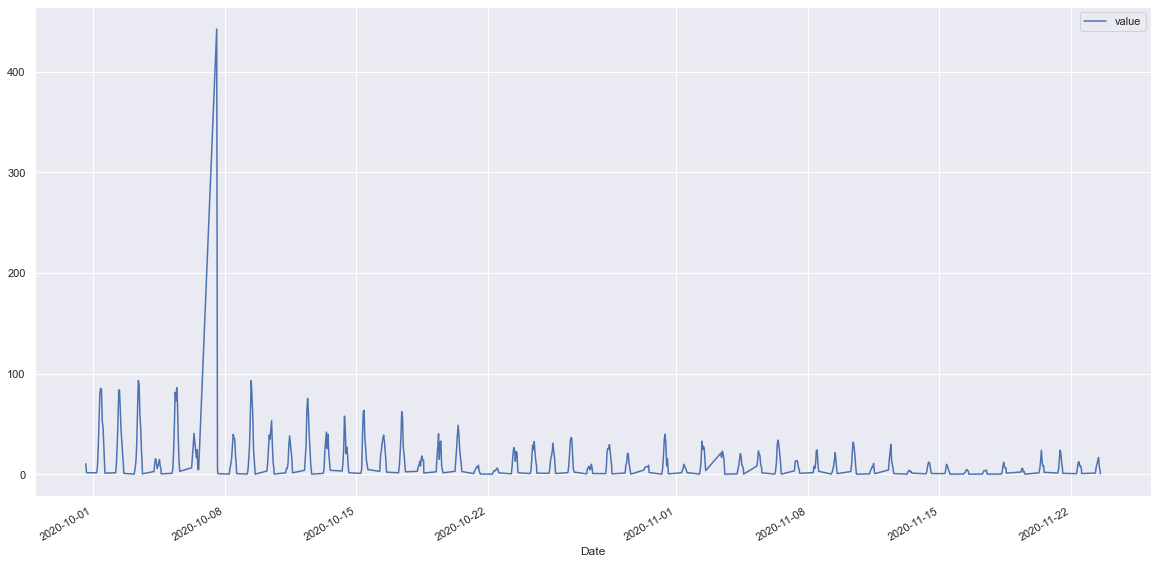

In [9]:
from matplotlib import pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

enprod1.plot()
pyplot.show()

In [10]:
enprod.host.describe()

count      500.0
mean     13318.0
std          0.0
min      13318.0
25%      13318.0
50%      13318.0
75%      13318.0
max      13318.0
Name: host, dtype: float64

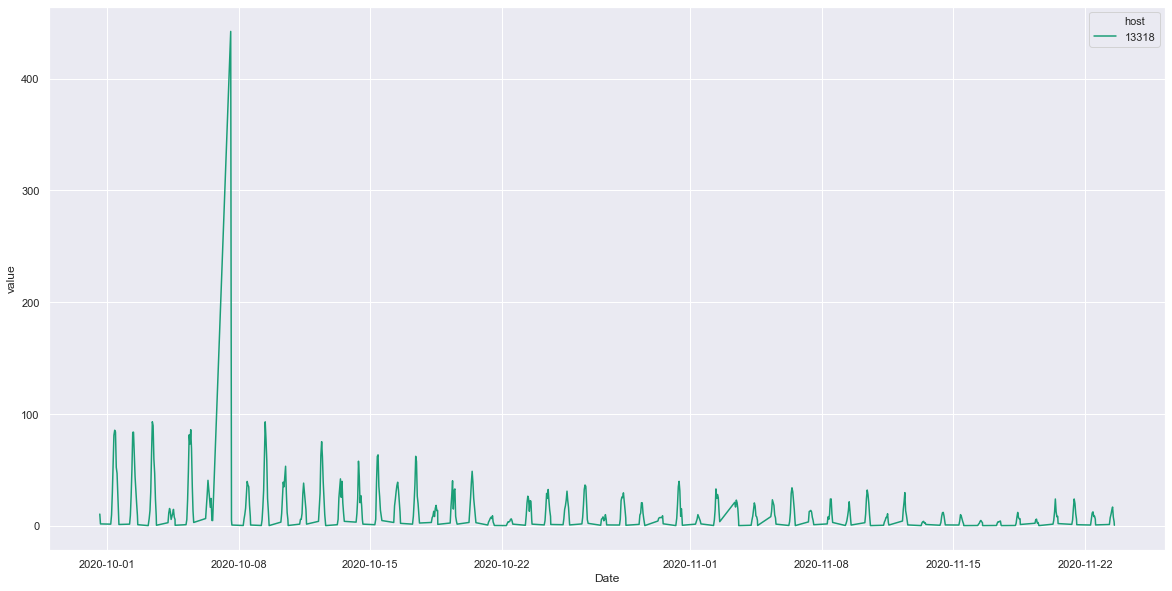

In [11]:
sns.lineplot(data=enprod, x='Date', y='value', hue='host',  palette="Dark2")

In [12]:
enprod = enprod.resample("12H", origin="07:00:00.000", on="Date").mean()
enprod = enprod.interpolate(method='time')
enprod.value =(enprod.value-enprod.value.mean())/enprod.value.std()
enprod = enprod[4:-5]
enprod["tm"] = enprod.index
enprod

tags          time     host     value                  tm
Date                                                                          
2020-10-02 07:00:00   NaN  1.601640e+18  13318.0  1.630876 2020-10-02 07:00:00
2020-10-02 19:00:00   NaN  1.601704e+18  13318.0 -0.327288 2020-10-02 19:00:00
2020-10-03 07:00:00   NaN  1.601726e+18  13318.0  1.799153 2020-10-03 07:00:00
2020-10-03 19:00:00   NaN  1.601793e+18  13318.0 -0.305053 2020-10-03 19:00:00
2020-10-04 07:00:00   NaN  1.601812e+18  13318.0 -0.201430 2020-10-04 07:00:00
2020-10-04 19:00:00   NaN  1.601878e+18  13318.0 -0.160876 2020-10-04 19:00:00
2020-10-05 07:00:00   NaN  1.601897e+18  13318.0  2.059818 2020-10-05 07:00:00
2020-10-05 19:00:00   NaN  1.601966e+18  13318.0 -0.063406 2020-10-05 19:00:00
2020-10-06 07:00:00   NaN  1.601984e+18  13318.0  0.483762 2020-10-06 07:00:00
2020-10-06 19:00:00   NaN  1.602033e+18  13318.0  3.906977 2020-10-06 19:00:00
2020-10-07 07:00:00   NaN  1.602082e+18  13318.0  7.330192 2020-10-07 07:00:00
2020-10-07 19:00:00   NaN  1.602139e+18  13318.0 -0.519851 2020-10-07 19:00:00
2020-10-08 07:00:00   NaN  1.602158e+18  13318.0  0.463846 2020-10-08 07:00:00
2020-10-08 19:00:00   NaN  1.602223e+18  13318.0 -0.289810 2020-10-08 19:00:00
2020-10-09 07:00:00   NaN  1.602244e+18  13318.0  1.496068 2020-10-09 07:00:00
2020-10-09 19:00:00   NaN  1.602311e+18  13318.0 -0.305053 2020-10-09 19:00:00
2020-10-10 07:00:00   NaN  1.602331e+18  13318.0  0.754997 2020-10-10 07:00:00
2020-10-10 19:00:00   NaN  1.602398e+18  13318.0 -0.495518 2020-10-10 19:00:00
2020-10-11 07:00:00   NaN  1.602416e+18  13318.0  0.326649 2020-10-11 07:00:00
2020-10-11 19:00:00   NaN  1.602484e+18  13318.0 -0.133047 2020-10-11 19:00:00
2020-10-12 07:00:00   NaN  1.602504e+18  13318.0  1.142826 2020-10-12 07:00:00
2020-10-12 19:00:00   NaN  1.602571e+18  13318.0 -0.506426 2020-10-12 19:00:00
2020-10-13 07:00:00   NaN  1.602589e+18  13318.0  0.664997 2020-10-13 07:00:00
2020-10-13 19:00:00   NaN  1.602657e+18  13318.0 -0.305053 2020-10-13 19:00:00
2020-10-14 07:00:00   NaN  1.602675e+18  13318.0  0.651572 2020-10-14 07:00:00
2020-10-14 19:00:00   NaN  1.602743e+18  13318.0 -0.506426 2020-10-14 19:00:00
2020-10-15 07:00:00   NaN  1.602761e+18  13318.0  1.010687 2020-10-15 07:00:00
2020-10-15 19:00:00   NaN  1.602830e+18  13318.0 -0.130530 2020-10-15 19:00:00
2020-10-16 07:00:00   NaN  1.602848e+18  13318.0  0.638148 2020-10-16 07:00:00
2020-10-16 19:00:00   NaN  1.602916e+18  13318.0 -0.420423 2020-10-16 19:00:00
2020-10-17 07:00:00   NaN  1.602934e+18  13318.0  0.908637 2020-10-17 07:00:00
2020-10-17 19:00:00   NaN  1.603002e+18  13318.0 -0.412452 2020-10-17 19:00:00
2020-10-18 07:00:00   NaN  1.603020e+18  13318.0 -0.068021 2020-10-18 07:00:00
2020-10-18 19:00:00   NaN  1.603089e+18  13318.0 -0.165351 2020-10-18 19:00:00
2020-10-19 07:00:00   NaN  1.603107e+18  13318.0  0.393144 2020-10-19 07:00:00
2020-10-19 19:00:00   NaN  1.603175e+18  13318.0 -0.232475 2020-10-19 19:00:00
2020-10-20 07:00:00   NaN  1.603193e+18  13318.0  0.689120 2020-10-20 07:00:00
2020-10-20 19:00:00   NaN  1.603262e+18  13318.0 -0.576067 2020-10-20 19:00:00
2020-10-21 07:00:00   NaN  1.603279e+18  13318.0 -0.421786 2020-10-21 07:00:00
2020-10-21 19:00:00   NaN  1.603347e+18  13318.0 -0.621796 2020-10-21 19:00:00
2020-10-22 07:00:00   NaN  1.603364e+18  13318.0 -0.464893 2020-10-22 07:00:00
2020-10-22 19:00:00   NaN  1.603434e+18  13318.0 -0.420423 2020-10-22 19:00:00
2020-10-23 07:00:00   NaN  1.603452e+18  13318.0  0.223970 2020-10-23 07:00:00
2020-10-23 19:00:00   NaN  1.603521e+18  13318.0 -0.541247 2020-10-23 19:00:00
2020-10-24 07:00:00   NaN  1.603539e+18  13318.0  0.301163 2020-10-24 07:00:00
2020-10-24 19:00:00   NaN  1.603607e+18  13318.0 -0.493001 2020-10-24 19:00:00
2020-10-25 07:00:00   NaN  1.603625e+18  13318.0  0.197120 2020-10-25 07:00:00
2020-10-25 19:00:00   NaN  1.603694e+18  13318.0 -0.441819 2020-10-25 19:00:00
2020-10-26 07:00:00   NaN  1.603710e+18  13318.0  0.473289 2020-10-26 0

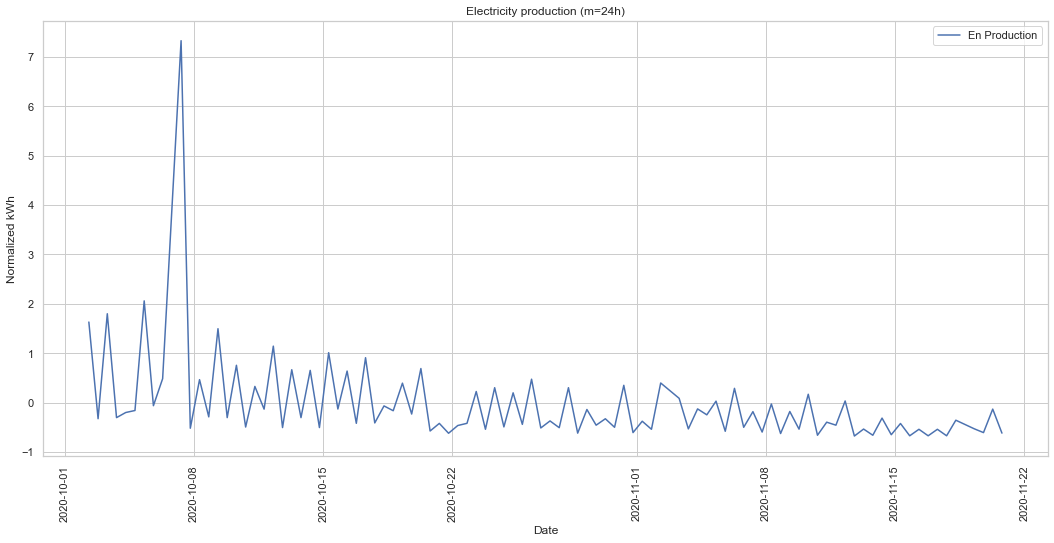

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.lineplot(data=enprod, x='tm', y='value', label="En Production")
plt.xticks(rotation=90)
plt.title("Electricity production (m=24h)")
plt.xlabel("Date")
plt.ylabel("Normalized kWh")
plt.show()

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

In [18]:
def readin(filename):
    path = "../DeltaDataAlgo/datafiles/"
    return pd.read_csv(path + filename)

In [19]:
_, _, filenames = next(walk("../DeltaDataAlgo/datafiles/"))

In [20]:
# Reads in all 33 data files, key is the filename
data = {}
for el in filenames:
    data[el] = readin(el)

In [22]:
lux = data["Lux.csv"].copy()
lux["time"] = pd.to_datetime(lux["time"],errors='coerce')
lux = lux.sort_values(by=["time"])
lux.set_index(lux["time"])
lux = lux.resample("12H", origin="07:00:00.000", on="time").mean()
lux = lux.interpolate(method='time')
lux.value = (lux.value-lux.value.mean())/lux.value.std()
lux = lux[4:-5]
lux["tm"] = lux.index

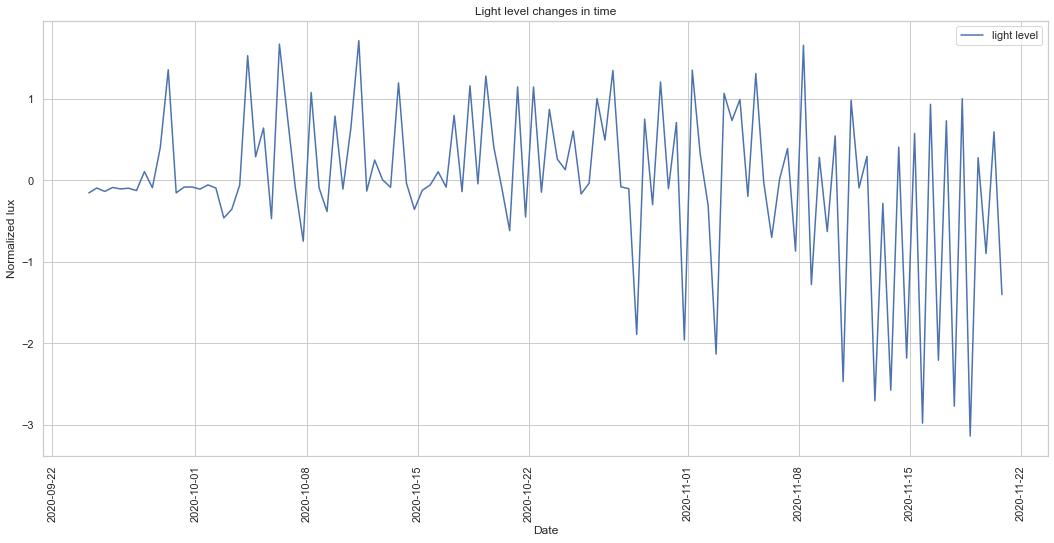

In [24]:
plt.figure(figsize=(18,8))
sns.lineplot(data=lux, x='tm', y='value', label="light level")
plt.xticks(rotation=90)
plt.title("Light level changes in time")
plt.xlabel("Date")
plt.ylabel("Normalized lux")
plt.grid(True);
plt.show()

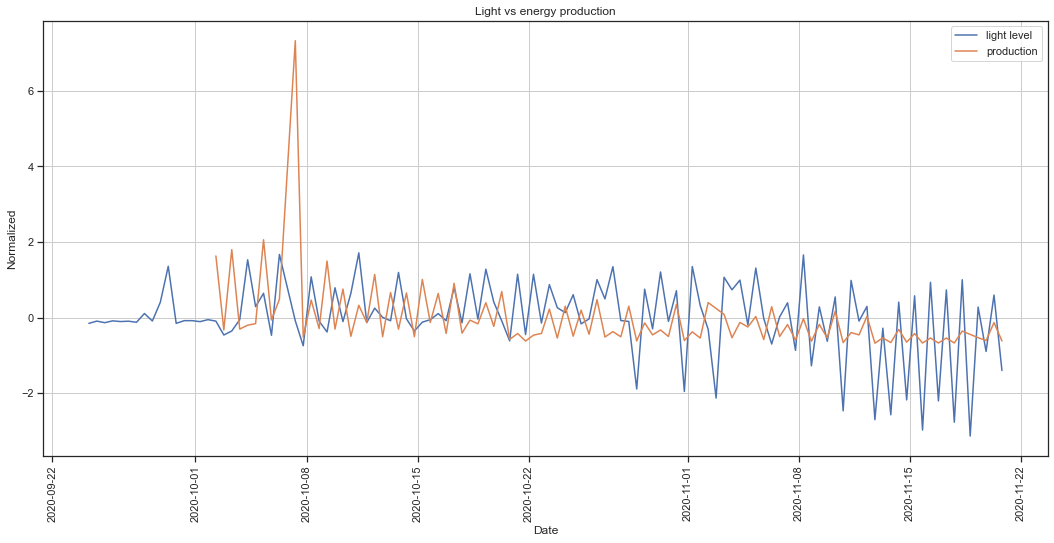

In [33]:
plt.figure(figsize=(18,8))
sns.lineplot(data=lux, x='tm', y='value', label="light level")
sns.lineplot(data=enprod, x='tm', y='value', label="production")
plt.xticks(rotation=90)
plt.title("Light vs energy production")
plt.xlabel("Date")
plt.ylabel("Normalized")
plt.grid(True)
plt.show()

In [34]:
temp = data["TE00.csv"].copy()
temp["time"] = pd.to_datetime(temp["time"],errors='coerce')
temp = temp.sort_values(by=["time"])
temp.set_index(temp["time"])
temp = temp.resample("12H", origin="07:00:00.000", on="time").mean()
temp = temp.interpolate(method='time')
temp.value =(temp.value-temp.value.mean())/temp.value.std()
temp = temp[4:-5]
temp["tm"] = temp.index

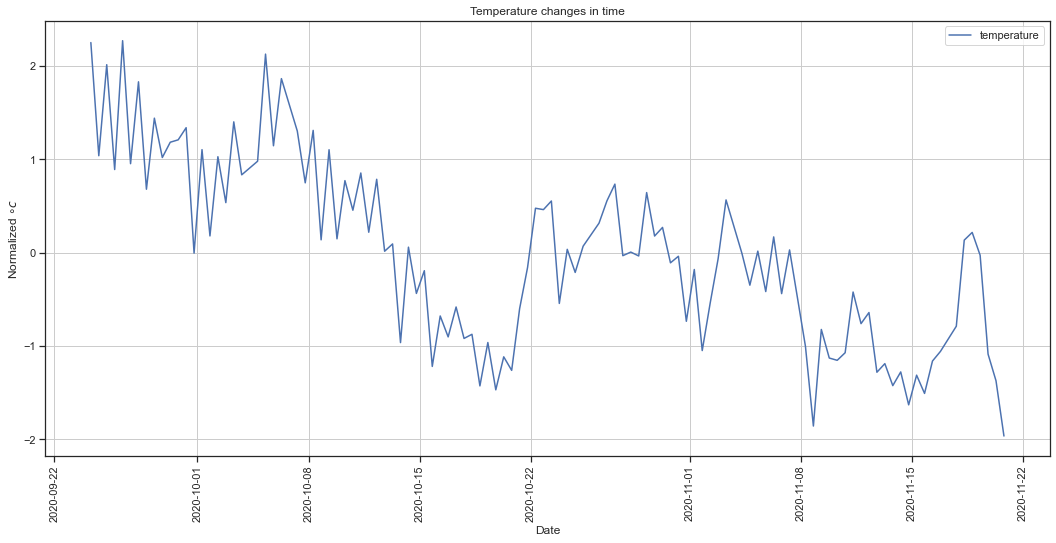

In [35]:
#sns.set_style("darkgrid")
plt.figure(figsize=(18,8))
sns.lineplot(data=temp, x='tm', y='value', label="temperature")
plt.xticks(rotation=90)
plt.title("Temperature changes in time")
plt.xlabel("Date")
plt.ylabel("Normalized $ \circ c$")
plt.grid(True);
plt.show()

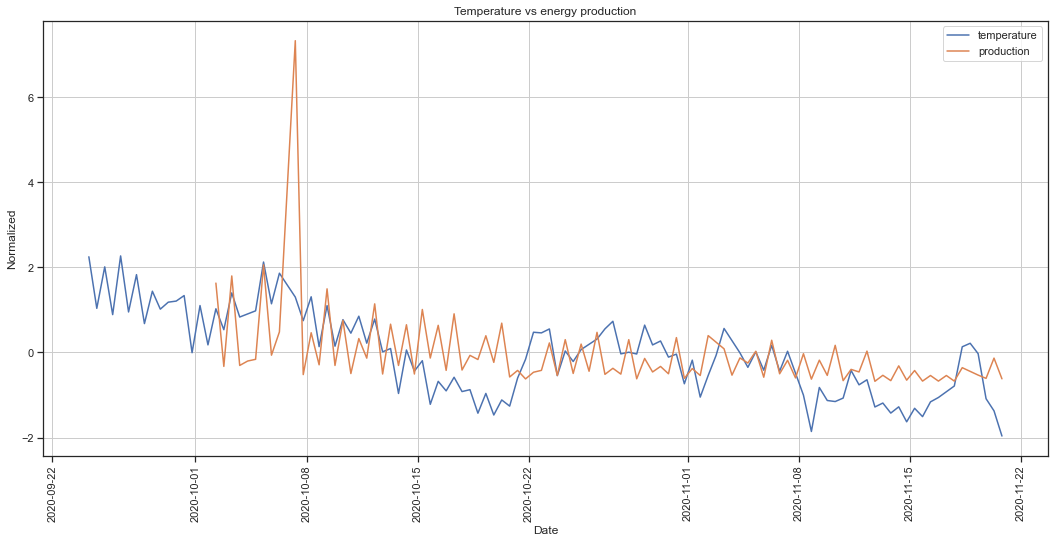

In [36]:
#sns.set_style("ticks")
plt.figure(figsize=(18,8))
sns.lineplot(data=temp, x='tm', y='value', label="temperature")
sns.lineplot(data=enprod, x='tm', y='value', label="production")
plt.xticks(rotation=90)
plt.title("Temperature vs energy production")
plt.xlabel("Date")
plt.ylabel("Normalized")
plt.grid(True)
plt.show()